In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# import pandas_profiling

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr_frozen_09272019.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(65064, 246)

Exclusions

In [4]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & (lsl_dr.hl==0)
                  & ((lsl_dr.autism==1)))

In [6]:
autism_subset = lsl_dr[inclusion_mask]
autism_subset.drop_duplicates(subset='study_id').shape

(36, 246)

## Demographics

In [7]:
autism_subset.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      116
Female     41
Name: male, dtype: int64

In [8]:
autism_subset.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       88
Other       38
Black       14
Hispanic     9
Asian        8
Name: race, dtype: int64

In [9]:
(autism_subset.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    121
<36 weeks      36
Name: premature_age, dtype: int64

In [10]:
autism_subset.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1          46
2          63
3          19
4+         10
Missing    19
Name: sib, dtype: int64

In [11]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

autism_subset.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    66
Unknown                    40
Some college               30
Some high school           21
Name: mother_ed, dtype: int64

In [12]:
autism_subset.father_ed.replace(ed_lookup).value_counts()

Unknown                    52
Bachelor's degree          44
Post graduate degree       37
High school diploma/GED    13
Some college               11
Name: father_ed, dtype: int64

In [13]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

autism_subset.family_inv.replace(family_lookup).value_counts()

Average Participation    60
Ideal Participation      52
Missing                  20
Good Participation       17
Below Average             8
Name: family_inv, dtype: int64

In [14]:
autism_subset[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,146.000000,142.000000,127.000000,157.000000
mean,15.767123,20.204225,20.055118,33.000000
std,18.262092,18.261512,17.763127,20.496716
min,0.000000,1.000000,1.000000,1.000000
25%,1.000000,3.250000,5.000000,19.000000
50%,10.000000,19.000000,20.000000,33.000000
75%,21.000000,27.000000,25.000000,46.000000
max,83.000000,83.000000,83.000000,83.000000


In [15]:
autism_subset.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION + outside    112
OPTION only          31
Name: otherserv, dtype: int64

## Hearing loss

In [16]:
autism_subset.degree_hl_ad.isnull().sum()

11

In [17]:
autism_subset.degree_hl_as.isnull().sum()

11

In [18]:
autism_subset.degree_hl_ad.value_counts()

6.0    84
3.0    23
4.0    13
5.0    13
1.0     8
2.0     5
Name: degree_hl_ad, dtype: int64

In [19]:
autism_subset.degree_hl_as.value_counts()

6.0    72
3.0    22
5.0    18
2.0    16
0.0     9
4.0     7
1.0     2
Name: degree_hl_as, dtype: int64

In [20]:
hl_data = autism_subset.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [21]:
autism_subset.one_or_both_parent_hl.value_counts()

0.0    128
1.0     12
Name: one_or_both_parent_hl, dtype: int64

In [22]:
autism_subset.one_or_both_parent_hl.isnull().sum()

17

Individuals with no hearing loss type

In [23]:
hl_data[hl_data.sum(1)==0].index.values

array(['0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0416-2012-8486', '0416-2012-8486', '0416-2012-8486',
       '0735-2011-0006', '0735-2011-0006', '0735-2011-0006',
       '0735-2011-0006', '0735-2011-0006'], dtype=object)

In [24]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      133
unilateral_snhl       6
unilateral_mixed      3
assymetrical          2
bilateral_mixed       2
unilateral_unk        0
unilateral_cond       0
unilateral_ansd       0
bilateral_unk         0
bilateral_normal      0
bilateral_cond        0
bilateral_ansd        0
dtype: int64

In [25]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.85
unilateral_snhl     0.04
unilateral_mixed    0.02
assymetrical        0.01
bilateral_mixed     0.01
unilateral_unk      0.00
unilateral_cond     0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_normal    0.00
bilateral_cond      0.00
bilateral_ansd      0.00
dtype: float64

In [26]:
tech_data = autism_subset.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [27]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        111
bilateral_ha         20
unilateral_ci        14
bimodal              10
unilateral_other      0
unilateral_ha         0
bilateral_other       0
dtype: int64

In [28]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.71
bilateral_ha        0.13
unilateral_ci       0.09
bimodal             0.06
unilateral_other    0.00
unilateral_ha       0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [29]:
tech_data[tech_data.sum(1)==0].index.values

array(['0735-2019-0020', '0735-2019-0020'], dtype=object)

## Hearing Loss

In [30]:
autism_subset.columns[autism_subset.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound'],
      dtype='object')

In [31]:
hl_data = autism_subset.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [32]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     69
bilateral_hl_moderate     14
bilateral_hl_severe       13
unilateral_hl_modsev       9
bilateral_hl_mild          3
bilateral_hl_slight        2
unilateral_hl_profound     0
unilateral_hl_severe       0
unilateral_hl_moderate     0
unilateral_hl_mild         0
unilateral_hl_slight       0
bilateral_hl_modsev        0
bilateral_hl_normal        0
dtype: int64

In [33]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.44
bilateral_hl_moderate     0.09
bilateral_hl_severe       0.08
unilateral_hl_modsev      0.06
bilateral_hl_mild         0.02
bilateral_hl_slight       0.01
unilateral_hl_profound    0.00
unilateral_hl_severe      0.00
unilateral_hl_moderate    0.00
unilateral_hl_mild        0.00
unilateral_hl_slight      0.00
bilateral_hl_modsev       0.00
bilateral_hl_normal       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [34]:
(autism_subset[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

11

## Summary of scores by domain

In [35]:
test_scores = lsl_dr[inclusion_mask].copy()

In [36]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [37]:
test_scores.groupby('domain').score_adj.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,9.0,77.2,14.8,51.7,77.4,78.7,83.2,98.3
Expressive Language,34.0,69.4,20.7,42.0,54.2,63.0,82.3,115.0
Expressive Vocabulary,23.0,76.9,24.1,20.0,66.5,76.3,92.7,124.0
Language,33.0,66.8,22.5,42.0,51.0,58.0,73.0,129.0
Receptive Language,33.0,67.5,20.7,45.8,50.7,64.0,74.0,140.0
Receptive Vocabulary,25.0,77.9,25.2,34.0,63.0,71.0,86.0,141.0


In [38]:
test_scores.domain.unique()

array(['Expressive Vocabulary', 'Receptive Vocabulary',
       'Receptive Language', 'Expressive Language', 'Language',
       'Articulation'], dtype=object)

In [39]:
test_scores['domain_labels'] = test_scores.domain.replace({'Expressive Vocabulary': 'Expressive\nVocabulary', 
                                                           'Receptive Vocabulary': 'Receptive\nVocabulary',
                                                           'Receptive Language': 'Receptive\nLanguage', 
                                                           'Expressive Language': 'Expressive\nLanguage', 
                                                           'Language': 'Total\nLanguage'})

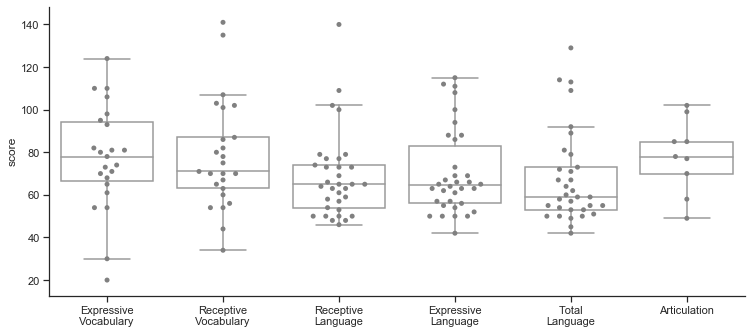

In [40]:
sns.catplot("domain_labels", y="score", data=test_scores, kind="box", color='white', fliersize=0)
sns.swarmplot("domain_labels", y="score", data=test_scores, color='grey')
fig = plt.gcf()
fig.set_size_inches(12, 5)
fig.axes[0].set_xlabel('');

## Domain-specific summaries

Age of amplification greater than 6mo.

In [43]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score_adj.describe())

count       mean        std  \
domain                age_amp_greater_6                                
Articulation          False                3.0  73.803439  20.080849   
                      True                 6.0  78.886760  13.412183   
Expressive Language   False               14.0  75.171120  24.256958   
                      True                20.0  65.343310  17.376545   
Expressive Vocabulary False                8.0  79.306960  27.376713   
                      True                15.0  75.691109  23.064933   
Language              False               14.0  71.875985  27.934802   
                      True                19.0  63.094254  17.335585   
Receptive Language    False               14.0  72.026917  27.521984   
                      True                19.0  64.200509  13.723710   
Receptive Vocabulary  False                9.0  84.173445  33.543602   
                      True                16.0  74.395828  19.382111   

                                               min        25%        50%  \
domain                age_amp_greater_6                                    
Articulation          False              51.721630  65.219663  78.717696   
                      True               56.462598  77.714229  78.986999   
Expressive Language   False              42.000000  60.226505  65.500000   
                      True               48.866200  51.500000  62.000000   
Expressive Vocabulary False              30.000000  71.750000  78.637372   
                      True               20.000000  64.500000  73.000000   
Language              False              42.000000  53.500000  57.789406   
                      True               44.790831  50.500000  58.000000   
Receptive Language    False              48.000000  50.162641  64.500000   
                      True               45.809673  53.500000  64.000000   
Receptive Vocabulary  False              44.000000  63.000000  71.000000   
                      True               34.000000  63.229390  72.500000   

                                               75%         max  
domain                age_amp_greater_6                         
Articulation          False              84.844343   90.970990  
                      True               82.239163   98.270773  
Expressive Language   False              96.500000  115.000000  
                      True               69.000000  112.000000  
Expressive Vocabulary False              86.545234  124.000000  
                      True               92.701415  110.000000  
Language              False              86.500000  129.000000  
                      True               69.000000  113.000000  
Receptive Language    False              77.750000  140.000000  
                      True               73.000000  100.000000  
Receptive Vocabulary  False              95.561004  141.000000  
                      True               85.229645  107.000000

Age of enrollment greater than 6mo.

In [42]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score_adj.describe())

count       mean        std  \
domain                age_enroll_greater_6                                
Articulation          False                   3.0  82.734837   7.133432   
                      True                    6.0  74.421061  17.421740   
Expressive Language   False                  14.0  71.028263  24.230883   
                      True                   20.0  68.243310  18.474617   
Expressive Vocabulary False                  10.0  79.118094  27.140741   
                      True                   13.0  75.280106  22.452998   
Language              False                  14.0  69.161699  27.989041   
                      True                   19.0  65.094254  18.040451   
Receptive Language    False                  14.0  70.884060  27.820234   
                      True                   19.0  65.042614  13.732027   
Receptive Vocabulary  False                  11.0  84.960091  31.171329   
                      True                   14.0  72.380946  18.596529   

                                                  min        25%        50%  \
domain                age_enroll_greater_6                                    
Articulation          False                 78.515824  78.616760  78.717696   
                      True                  51.721630  61.708706  78.452603   
Expressive Language   False                 42.000000  54.250000  62.500000   
                      True                  48.866200  54.500000  64.000000   
Expressive Vocabulary False                 30.000000  67.000000  77.500000   
                      True                  20.000000  68.000000  76.274745   
Language              False                 42.000000  51.500000  55.789406   
                      True                  44.790831  51.500000  59.000000   
Receptive Language    False                 48.000000  50.162641  61.798828   
                      True                  45.809673  55.500000  64.000000   
Receptive Vocabulary  False                 44.000000  66.500000  71.000000   
                      True                  34.000000  59.688169  72.500000   

                                                   75%         max  
domain                age_enroll_greater_6                          
Articulation          False                  84.844343   90.970990  
                      True                   82.239163   98.270773  
Expressive Language   False                  82.282155  115.000000  
                      True                   73.750000  112.000000  
Expressive Vocabulary False                  97.635702  124.000000  
                      True                   92.402830  110.000000  
Language              False                  76.777444  129.000000  
                      True                   72.000000  113.000000  
Receptive Language    False                  73.750000  140.000000  
                      True                   75.000000  100.000000  
Receptive Vocabulary  False                 101.280502  141.000000  
                      True                   84.229645  103.000000

(Non-)Profound hearing loss

In [44]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score_adj.describe())

count       mean        std        min  \
domain                profound_hl                                           
Articulation          False          6.0  80.064152  14.272583  56.462598   
                      True           3.0  71.448655  17.184409  51.721630   
Expressive Language   False         15.0  67.617804  18.860711  49.631723   
                      True          19.0  70.789201  22.505650  42.000000   
Expressive Vocabulary False         10.0  77.240283  23.616543  30.000000   
                      True          13.0  76.724576  25.398996  20.000000   
Language              False         14.0  64.082429  18.865114  46.575196   
                      True          19.0  68.836874  25.129454  42.000000   
Receptive Language    False         14.0  65.160587  13.186065  48.000000   
                      True          19.0  69.259910  25.094310  45.809673   
Receptive Vocabulary  False         11.0  74.949348  20.267062  44.000000   
                      True          14.0  80.246530  28.965042  34.000000   

                                         25%        50%        75%         max  
domain                profound_hl                                               
Articulation          False        77.714229  78.616760  87.907667   98.270773  
                      True         65.589902  79.458174  81.312167   83.166159  
Expressive Language   False        54.500000  62.000000  77.000000  112.000000  
                      True         53.500000  65.000000  78.564310  115.000000  
Expressive Vocabulary False        70.750000  77.500000  89.802122  110.000000  
                      True         65.000000  76.274745  93.000000  124.000000  
Language              False        52.000000  57.500000  65.750000  113.000000  
                      True         51.500000  59.000000  76.000000  129.000000  
Receptive Language    False        57.149414  64.500000  71.250000  100.000000  
                      True         50.000000  63.000000  78.000000  140.000000  
Receptive Vocabulary  False        61.500000  70.000000  88.221413  107.000000  
                      True         65.500000  75.500000  85.743215  141.000000

Parent with(out) hearing loss

In [45]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score_adj.describe())

count       mean        std        min  \
domain                parent_with_hl                                           
Articulation          False             7.0  74.900245  15.946961  51.721630   
                      True              2.0  85.214582   8.140790  79.458174   
Expressive Language   False            32.0  70.262365  21.007959  42.000000   
                      True              2.0  55.433100   9.286999  48.866200   
Expressive Vocabulary False            21.0  77.515348  24.984959  20.000000   
                      True              2.0  71.000000  14.142136  61.000000   
Language              False            31.0  67.911735  22.740328  42.000000   
                      True              2.0  49.895415   7.218973  44.790831   
Receptive Language    False            31.0  68.270221  21.007726  46.000000   
                      True              2.0  55.904837  14.276717  45.809673   
Receptive Vocabulary  False            23.0  78.951924  25.752653  34.000000   
                      True              2.0  66.000000  16.970563  54.000000   

                                            25%        50%        75%  \
domain                parent_with_hl                                    
Articulation          False           66.954815  78.515824  80.941928   
                      True            82.336378  85.214582  88.092786   
Expressive Language   False           54.750000  64.000000  86.500000   
                      True            52.149650  55.433100  58.716550   
Expressive Vocabulary False           68.000000  76.274745  93.000000   
                      True            66.000000  71.000000  76.000000   
Language              False           52.000000  59.000000  76.000000   
                      True            47.343123  49.895415  52.447708   
Receptive Language    False           51.825282  64.000000  75.500000   
                      True            50.857255  55.904837  60.952418   
Receptive Vocabulary  False           64.000000  71.000000  90.780502   
                      True            60.000000  66.000000  72.000000   

                                             max  
domain                parent_with_hl              
Articulation          False            98.270773  
                      True             90.970990  
Expressive Language   False           115.000000  
                      True             62.000000  
Expressive Vocabulary False           124.000000  
                      True             81.000000  
Language              False           129.000000  
                      True             55.000000  
Receptive Language    False           140.000000  
                      True             66.000000  
Receptive Vocabulary  False           141.000000  
                      True             78.000000

Mother with(out) college education

In [46]:
test_scores.groupby(['domain', 'mother_college']).score_adj.describe()

count       mean        std        min  \
domain                mother_college                                           
Articulation          0.0               5.0  81.477269  15.886384  56.462598   
                      1.0               3.0  78.540967   1.017152  77.447031   
Expressive Language   0.0              18.0  67.340479  16.951416  42.000000   
                      1.0               6.0  80.916923  26.922067  48.866200   
Expressive Vocabulary 0.0              14.0  77.010339  21.794083  20.000000   
                      1.0               4.0  84.350707  21.409621  61.000000   
Language              0.0              17.0  65.124105  16.931568  42.000000   
                      1.0               6.0  77.394941  30.392498  44.790831   
Receptive Language    0.0              17.0  66.419331  13.872891  46.000000   
                      1.0               6.0  73.234555  26.631620  45.809673   
Receptive Vocabulary  0.0              16.0  74.590714  16.279522  34.000000   
                      1.0               5.0  90.088565  33.396265  54.000000   

                                            25%        50%         75%  \
domain                mother_college                                     
Articulation          0.0             78.515824  83.166159   90.970990   
                      1.0             78.082364  78.717696   79.087935   
Expressive Language   0.0             56.250000  64.000000   70.596464   
                      1.0             61.226505  77.000000  105.250000   
Expressive Vocabulary 0.0             68.750000  80.023123   90.250000   
                      1.0             70.750000  83.201415   96.802122   
Language              0.0             55.000000  62.000000   71.000000   
                      1.0             55.394703  68.789406  105.000000   
Receptive Language    0.0             59.000000  66.000000   73.000000   
                      1.0             51.899414  67.298828   94.250000   
Receptive Vocabulary  0.0             69.250000  73.000000   82.743215   
                      1.0             60.000000  98.442827  103.000000   

                                             max  
domain                mother_college              
Articulation          0.0              98.270773  
                      1.0              79.458174  
Expressive Language   0.0             108.000000  
                      1.0             112.000000  
Expressive Vocabulary 0.0             106.000000  
                      1.0             110.000000  
Language              0.0             109.000000  
                      1.0             114.000000  
Receptive Language    0.0             102.000000  
                      1.0             109.000000  
Receptive Vocabulary  0.0             107.000000  
                      1.0             135.000000